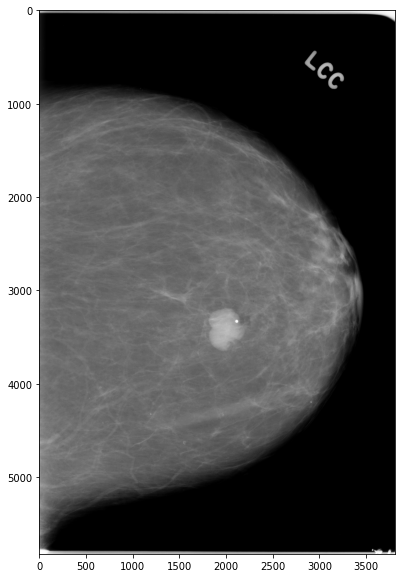

In [4]:
import numpy as np
import skimage.color
import skimage.io
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
# %matplotlib widget

# read the image of a plant seedling as grayscale from the outset
image = skimage.io.imread(fname='F:/Dataset/Mammography/3_1/P_00199_LEFT_CC.png', as_gray=True)

# display the image
figure(figsize=(10, 10))
plt.imshow(image, cmap='gray')
plt.show()

In [5]:
histogram, bin_edges = np.histogram(image, bins=255*255, range=(1, 255))
histogram

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

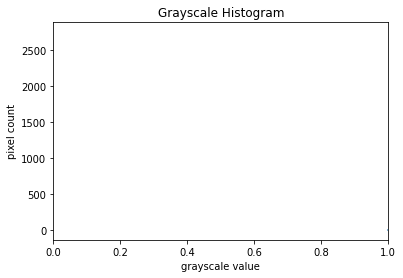

In [6]:
plt.figure()
plt.title("Grayscale Histogram")
plt.xlabel("grayscale value")
plt.ylabel("pixel count")
plt.xlim([0.0, 1.0])  # <- named arguments do not work here

plt.plot(bin_edges[0:-1], histogram)  # <- or here
plt.show()

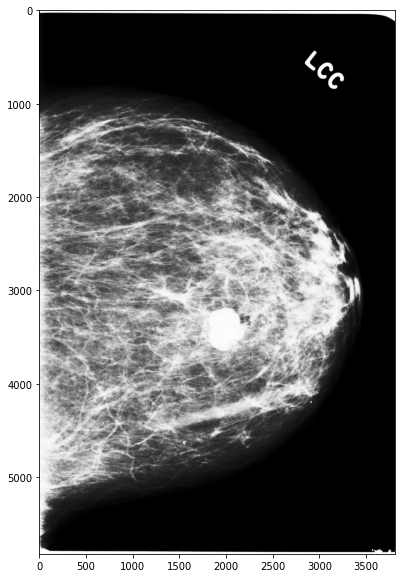

In [8]:
import cv2
import numpy
 
img = cv2.imread('F:/Dataset/Mammography/3_1/P_00199_LEFT_CC.png')
img_to_yuv = cv2.cvtColor(img,cv2.COLOR_BGR2YUV)
img_to_yuv[:,:,0] = cv2.equalizeHist(img_to_yuv[:,:,0])
hist_equalization_result = cv2.cvtColor(img_to_yuv, cv2.COLOR_YUV2BGR)
 
# display the image
figure(figsize=(10, 10))
plt.imshow(hist_equalization_result, cmap='gray')
plt.show()    
# cv2.imwrite('result.jpg',hist_equalization_result)

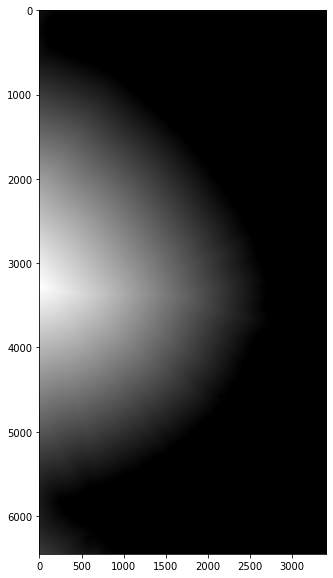

In [38]:
from scipy import ndimage
img = skimage.io.imread(fname='F:/Dataset/Mammography/3_1/P_00034_RIGHT_CC.png', as_gray=True)
arroz = ndimage.distance_transform_edt(img)
figure(figsize=(10, 10))
plt.imshow(arroz, cmap='gray')
plt.show()

In [41]:
import numpy as np
from skimage.feature import greycomatrix, greycoprops
from skimage import io, color, img_as_ubyte

img = io.imread('F:/Dataset/Mammography/3_1/P_00034_RIGHT_CC.png')

# gray = color.rgb2gray(img)
gray = img
image = img_as_ubyte(gray)

bins = np.array([0, 16, 32, 48, 64, 80, 96, 112, 128, 144, 160, 176, 192, 208, 224, 240, 255]) #16-bit
inds = np.digitize(image, bins)

max_value = inds.max()+1
matrix_coocurrence = greycomatrix(inds, [1], [0, np.pi/4, np.pi/2, 3*np.pi/4], levels=max_value, normed=False, symmetric=False)

# GLCM properties
def contrast_feature(matrix_coocurrence):
	contrast = greycoprops(matrix_coocurrence, 'contrast')
	return "Contrast = ", contrast

def dissimilarity_feature(matrix_coocurrence):
	dissimilarity = greycoprops(matrix_coocurrence, 'dissimilarity')	
	return "Dissimilarity = ", dissimilarity

def homogeneity_feature(matrix_coocurrence):
	homogeneity = greycoprops(matrix_coocurrence, 'homogeneity')
	return "Homogeneity = ", homogeneity

def energy_feature(matrix_coocurrence):
	energy = greycoprops(matrix_coocurrence, 'energy')
	return "Energy = ", energy

def correlation_feature(matrix_coocurrence):
	correlation = greycoprops(matrix_coocurrence, 'correlation')
	return "Correlation = ", correlation

def asm_feature(matrix_coocurrence):
	asm = greycoprops(matrix_coocurrence, 'ASM')
	return "ASM = ", asm

print(contrast_feature(matrix_coocurrence))
print(dissimilarity_feature(matrix_coocurrence))
print(homogeneity_feature(matrix_coocurrence))
print(energy_feature(matrix_coocurrence))
print(correlation_feature(matrix_coocurrence))
print(asm_feature(matrix_coocurrence))

C:\Users\Raul\anaconda3\envs\ObjectDetection\lib\site-packages\skimage\feature\__init__.py:35: skimage_deprecation: Function ``greycomatrix`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycomatrix`` instead.
  removed_version='1.0')


('Contrast = ', array([[0.03420089, 0.05645997, 0.04534114, 0.05656515]]))
('Dissimilarity = ', array([[0.03200592, 0.05213628, 0.04340321, 0.05254198]]))
('Homogeneity = ', array([[0.9841426 , 0.97428358, 0.97848893, 0.97405551]]))
('Energy = ', array([[0.53706727, 0.53451572, 0.53542239, 0.53445687]]))
('Correlation = ', array([[0.99927158, 0.99879741, 0.99903396, 0.99879418]]))
('ASM = ', array([[0.28844126, 0.28570706, 0.28667714, 0.28564415]]))


C:\Users\Raul\anaconda3\envs\ObjectDetection\lib\site-packages\skimage\feature\__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
C:\Users\Raul\anaconda3\envs\ObjectDetection\lib\site-packages\skimage\feature\__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
C:\Users\Raul\anaconda3\envs\ObjectDetection\lib\site-packages\skimage\feature\__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
C:\Users\Raul\anaconda3\envs\ObjectDetection\lib\site-packages\skimage\feature\__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.gray

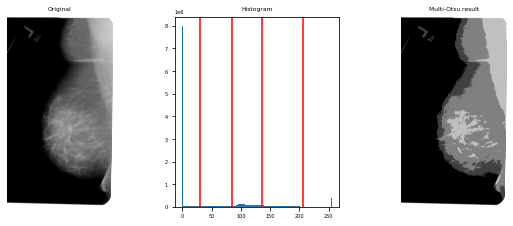

In [31]:
import matplotlib
import matplotlib.pyplot as plt
import numpy as np

from skimage import data
from skimage.filters import threshold_multiotsu

# Setting the font size for all plots.
matplotlib.rcParams['font.size'] = 5

# The input image.
image = cv2.imread('F:/Dataset/Mammography/3_1/P_00004_LEFT_MLO.png')
image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
# Applying multi-Otsu threshold for the default value, generating
# three classes.
thresholds = threshold_multiotsu(image, classes=5)
regions = np.digitize(image, bins=thresholds)

fig, ax = plt.subplots(nrows=1, ncols=3, figsize=(10, 3.5))

# Plotting the original image.
ax[0].imshow(image, cmap='gray')
ax[0].set_title('Original')
ax[0].axis('off')

# Plotting the histogram and the two thresholds obtained from
# multi-Otsu.
ax[1].hist(image.ravel(), bins=255)
ax[1].set_title('Histogram')
for thresh in thresholds:
    ax[1].axvline(thresh, color='r')

# Plotting the Multi Otsu result.
ax[2].imshow(regions, cmap='gray')
ax[2].set_title('Multi-Otsu result')
ax[2].axis('off')

plt.subplots_adjust()

plt.show()

In [43]:
for thresh in thresholds:
    print(thresh)

31
85
136
206


In [54]:
min(thresholds),thresholds[1]

(31, 85)

In [64]:
image = cv2.imread('F:/Dataset/Mammography/3_1/P_00004_LEFT_MLO.png')
image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
bin_image=image
for i in range(len(image)):
    for j in range(len(image[0])):
        if(thresholds[0]<image[i][j]<max(thresholds)):
            bin_image[i][j]=1
        else: bin_image[i][j]=0

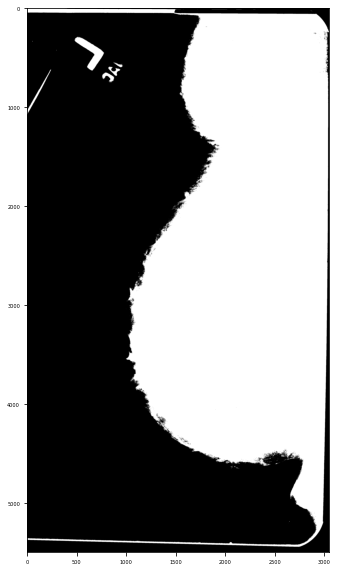

In [65]:
figure(figsize=(10, 10))
plt.imshow(bin_image, cmap='gray')
plt.show()

In [93]:
# image = cv2.imread('F:/Dataset/Mammography/3_1/P_00199_LEFT_CC.png')
image = cv2.imread('C:/Users/Raul/Desktop/Tese/CBIS/P_00004_LEFT_MLO.png')
image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

clahe = cv2.createCLAHE(clipLimit=2, tileGridSize=(4,4))
cl1 = clahe.apply(image)
cv2.imwrite('clahe4.jpg',cl1)

True

In [78]:
contours,hierarchy = cv2.findContours(bin_image, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_NONE)
# cv2.drawContours(output, contours, -1, 255, 3)
biggest_contours =[]
for cont in contours:
    biggest_contours.append(len(cont))
    # print(len(cont))
max(biggest_contours)
index = biggest_contours.index(max(biggest_contours))
print(max(biggest_contours), index)
print(len(contours[index]))

image_copy = bin_image.copy()
cv2.drawContours(image=image_copy, contours=contours[index], contourIdx=-1, color=(255, 255, 255), thickness=2, lineType=cv2.LINE_AA)
# see the results
cv2.imshow('None approximation', image_copy)
cv2.waitKey(0)
cv2.imwrite('contours_none_image1.jpg', image_copy)
cv2.destroyAllWindows()


45342 1881
45342


In [24]:
kernel = np.ones((5,5), np.uint8)
# c = c.astype('uint8')   
    # defining the gradient function
    # over the image and structuring element
gradient = cv2.morphologyEx(regions.astype('uint8'), cv2.MORPH_GRADIENT, kernel)

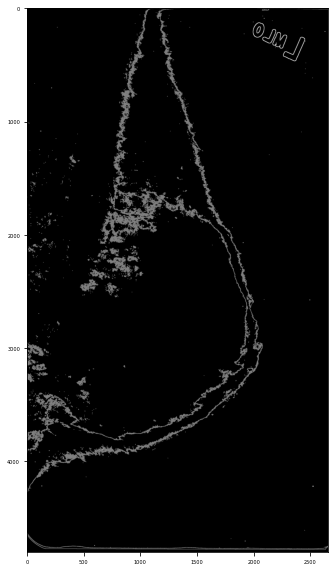

In [25]:
figure(figsize=(10, 10))
plt.imshow(gradient, cmap='gray')
plt.show()